In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

df.head(30)

age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0   75.0        0                       582  ...        0     4            1
1   55.0        0                      7861  ...        0     6            1
2   65.0        0                       146  ...        1     7            1
3   50.0        1                       111  ...        0     7            1
4   65.0        1                       160  ...        0     8            1
5   90.0        1                        47  ...        1     8            1
6   75.0        1                       246  ...        0    10            1
7   60.0        1                       315  ...        1    10            1
8   65.0        0                       157  ...        0    10            1
9   80.0        1                       123  ...        1    10            1
10  75.0        1                        81  ...        1    10            1
11  62.0        0                       231  ...        1    10            1
12  45.0        1                       981  ...        0    11            1
13  50.0        1                       168  ...        0    11            1
14  49.0        1                        80  ...        0    12            0
15  82.0        1                       379  ...        0    13            1
16  87.0        1                       149  ...        0    14            1
17  45.0        0                       582  ...        0    14            1
18  70.0        1                       125  ...        0    15            1
19  48.0        1                       582  ...        0    15            1
20  65.0        1                        52  ...        0    16            0
21  65.0        1                       128  ...        0    20            1
22  68.0        1                       220  ...        1    20            1
23  53.0        0                        63  ...        0    22            0
24  75.0        0                       582  ...        0    23            1
25  80.0        0                       148  ...        1    23            1
26  95.0        1                       112  ...        0    24            1
27  70.0        0                       122  ...        1    26            1
28  58.0        1                        60  ...        0    26            1
29  82.0        0                        70  ...        1    26            1

[30 rows x 13 columns]

In [ ]:
!pip install pandas-profiling==2.8.0
import pandas_profiling as pdp
report = pdp.ProfileReport(df, title='Pandas Profiling Report')

     |████████████████████████████████| 259 kB 12.9 MB/s 
     |████████████████████████████████| 59 kB 5.9 MB/s 
     |████████████████████████████████| 675 kB 41.9 MB/s 
     |████████████████████████████████| 4.7 MB 42.9 MB/s 
     |████████████████████████████████| 812 kB 38.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ccc370645d108748dce79e611b7cd113af4892d00e5e2eade30b94687359ced6
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=2ef03af9339ba24abbce92c60b15245a5621672e28acf53dc96144a2c928661c
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalli

OSError: ignored

In [ ]:
report.to_widgets() 

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

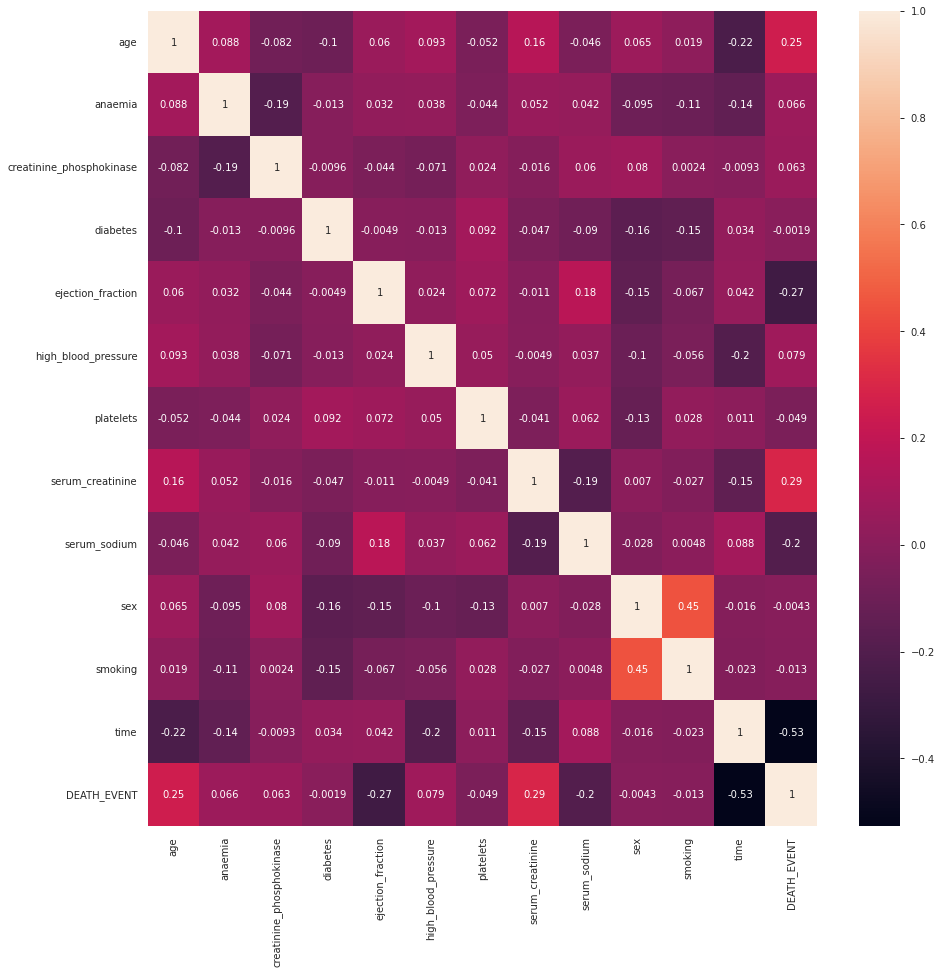

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

[0.09507537 0.02853683 0.07158359 0.03020259 0.13084291 0.02325158
 0.07544688 0.11242401 0.08941096 0.02920538 0.02695965 0.28706024]


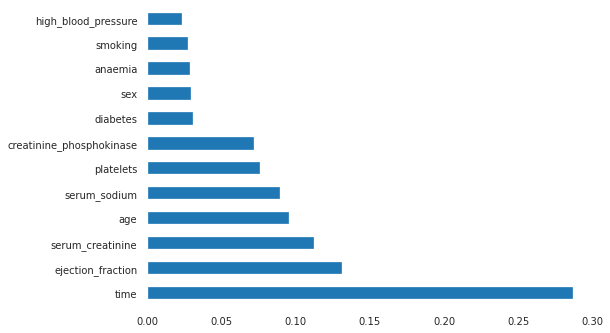

age                            11.894809
anaemia                         0.496107
creatinine_phosphokinase      970.287881
diabetes                        0.494067
ejection_fraction              11.834841
high_blood_pressure             0.478136
platelets                   97804.236869
serum_creatinine                1.034510
serum_sodium                    4.412477
sex                             0.478136
smoking                         0.467670
time                           77.614208
dtype: float64
age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           

In [ ]:
x = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()
x1=x
mean = x1.mean(axis=0)
x1 -= mean
std = x1.std(axis=0)
x1 /= std
print(std)
print(mean)
print(std[0])
print(std[4])
print(std[7])
print(std[11])
print(mean[0])
print(mean[4])
print(mean[7])
print(mean[11])

In [ ]:
df.describe()

age     anaemia  ...        time  DEATH_EVENT
count  299.000000  299.000000  ...  299.000000    299.00000
mean    60.833893    0.431438  ...  130.260870      0.32107
std     11.894809    0.496107  ...   77.614208      0.46767
min     40.000000    0.000000  ...    4.000000      0.00000
25%     51.000000    0.000000  ...   73.000000      0.00000
50%     60.000000    0.000000  ...  115.000000      0.00000
75%     70.000000    1.000000  ...  203.000000      1.00000
max     95.000000    1.000000  ...  285.000000      1.00000

[8 rows x 13 columns]

In [ ]:
df=df[df['ejection_fraction']<70]

In [ ]:
## data preprocessing

#inp_data = df.drop(df[['DEATH_EVENT']], axis=1)
inp_data = df.iloc[:,[0,4,7,11]]
out_data = df[['DEATH_EVENT']]

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=0)
print(type(X_test))
print(X_test)
## Applying Transformer
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_test)

<class 'pandas.core.frame.DataFrame'>
        age  ejection_fraction  serum_creatinine  time
112  50.000                 25              1.60    90
151  62.000                 60              0.90   117
12   45.000                 30              1.10    11
218  68.000                 35              1.10   197
140  80.000                 38              1.10   109
75   60.000                 20              0.70    73
209  49.000                 35              0.80   187
172  70.000                 60              1.10   146
188  60.667                 40              1.00   172
215  73.000                 35              1.30   195
74   69.000                 20              1.20    73
15   82.000                 50              1.30    13
269  40.000                 35              1.00   244
107  45.000                 35              0.90    88
22   68.000                 35              0.90    20
226  58.000                 25              1.30   205
268  45.000                

In [ ]:
## X_train, X_test, y_train, y_test Shape

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (237, 4)
X_test Shape  :  (60, 4)
y_train Shape :  (237, 1)
y_test Shape  :  (60, 1)


In [ ]:
## I coded this method for convenience and to avoid writing the same code over and over again

def result(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('Decision Tree Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
    print('Decision Tree Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
    print('Decision Tree Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
    print("Decision Tree Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
    print("\n",classification_report(y_pred, y_test))
    
    plt.figure(figsize=(6,6))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
    plt.title("DecisionTreeClassifier Confusion Matrix (Rate)")
    plt.show()
    
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, cmap="Blues",
                xticklabels=["FALSE","TRUE"],
                yticklabels=["FALSE","TRUE"],
                cbar=False)
    plt.title("DecisionTreeClassifier Confusion Matrix (Number)")
    plt.show()
    
def sample_result(class_weight=None,criterion='gini',max_depth=None,max_features=None,max_leaf_nodes=None,min_samples_split=2):    
    scores = [] 
    for i in range(0,10000): # 10.000 samples
        X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2)
        clf = DecisionTreeClassifier(class_weight= class_weight,
                                     criterion=criterion,
                                     max_depth=max_depth,
                                     max_features=max_features,
                                     max_leaf_nodes=max_leaf_nodes,
                                     min_samples_split=min_samples_split) 
        sc=StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.fit_transform(X_test)
        clf.fit(X_train, y_train)
        scores.append(accuracy_score(clf.predict(X_test), y_test)) 
    
    plt.hist(scores)
    plt.show()
    print("Best Score: {}\nMean Score: {}".format(np.max(scores), np.mean(scores)))

Accuracy Score: 0.8333
Decision Tree Classifier f1-score      : 0.7222
Decision Tree Classifier precision     : 0.6842
Decision Tree Classifier recall        : 0.7647
Decision Tree Classifier roc auc score : 0.8126

               precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



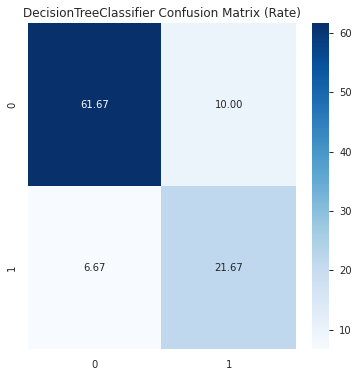

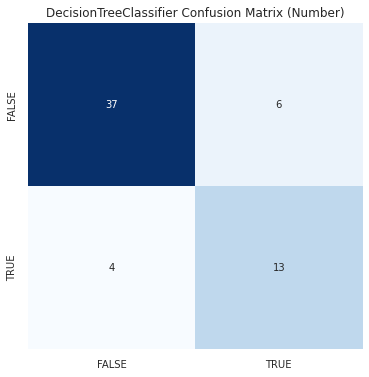

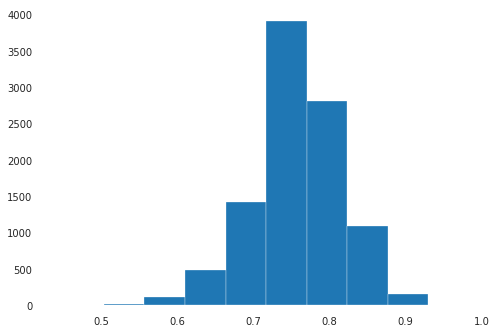

Best Score: 0.9833333333333333
Mean Score: 0.75693


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
result(clf)
sample_result()

In [ ]:
param_grid = {
    "max_depth": np.arange(1,10),
    "min_samples_split": [0.001, 0.01, 0.1, 0.2, 0.02, 0.002],
    "criterion": ["gini", "entropy", None],
    "max_leaf_nodes": np.arange(1,10),
    "class_weight": ["balanced", None]
}

clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

Streaming output truncated to the last 5000 lines.
[CV] END class_weight=None, criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=0.2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=0.2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=0.02; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=0.02; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=0.02; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=0.02; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=0.02; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=0.02; to

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_split': 0.001}

Accuracy Score: 0.9833
Decision Tree Classifier f1-score      : 0.9697
Decision Tree Classifier precision     : 1.0000
Decision Tree Classifier recall        : 0.9412
Decision Tree Classifier roc auc score : 0.9706

               precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.94      1.00      0.97        16

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



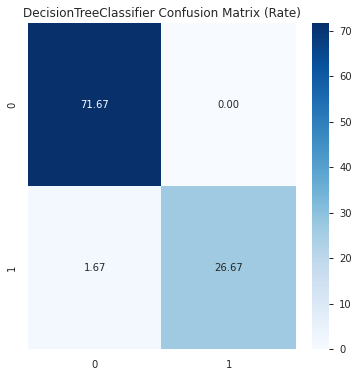

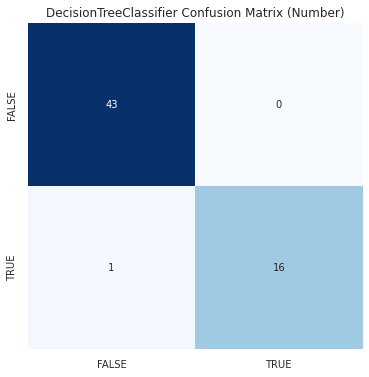

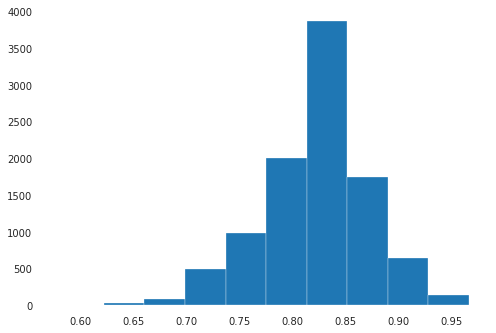

Best Score: 0.9666666666666667
Mean Score: 0.8238433333333335


In [ ]:
clf = DecisionTreeClassifier(
    class_weight='balanced',
    criterion='gini',
    max_depth=1,
    max_leaf_nodes=2,
    min_samples_split=0.001,
    random_state=0
)

result(clf)
# class_weight=None,criterion='gini',max_depth=None,max_features=None,max_leaf_nodes=None,min_samples_split=2
sample_result('balanced',"gini",1 ,None , 2,  0.001)

In [ ]:
from sklearn.preprocessing import MinMaxScaler as minmax
a=float(49)
e=float(30)
s=float(1)
t=float(12)
a1=(a-mean[0])/std[0]
e1=(e-mean[4])/std[4]
s1=(s-mean[7])/std[7]
t1=(t-mean[11])/std[11]
user_input=[a1,e1,s1,t1]
user_input=np.array(user_input)
user_input=[user_input]
clf_Y_pred=clf.predict(user_input)
print(clf.predict(user_input))
print(clf_Y_pred)
if(clf_Y_pred[0]==1):
  print("Warning! You have chances of getting a heart disease!")
else:
  print("You are healthy and are less likely to get a heart disease!")



[-0.9948787662688273, -0.683035134735914, -0.3807402289592383, -1.5237013001660138]
-0.9948787662688273
[array([-0.99487877, -0.68303513, -0.38074023, -1.5237013 ])]
[1]
[1]
Warning! You have chances of getting a heart disease!


In [ ]:
import pickle as pkl
pkl.dump(clf,open("final_model.p","wb"))

In [ ]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

1.0.1


In [ ]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

In [ ]:
%%writefile healthy-heart-app.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
#Load the saved model
model=pkl.load(open("final_model.p","rb"))

st.set_page_config(page_title="Healthy Heart App",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")

def preprocess(age,ejection,serum,time ):   
 
    
    # Pre-processing user input   
    a=float(age)
    e=float(ejection)
    s=float(serum)
    t=float(time)
    m0=60.83389297658862
    m4=38.08361204013378
    m7=1.393879598662207
    m11=130.2608695652174
    std0=11.894809074044478
    std4=11.834840741039178
    std7=1.0345100640898532
    std11=77.61420795029339
    a1=(a-m0)/std0
    e1=(e-m4)/std4
    s1=(s-m7)/std7
    t1=(t-m11)/std11
    user_input=[a1,e1,s1,t1]
    user_input=np.array(user_input)
    user_input=[user_input]
    prediction=model.predict(user_input)
    return prediction
    
    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Healthy Heart App</h1> 
    </div> 
    """
      
# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
st.subheader('by Team-5 ')
      
# following lines create boxes in which user can enter data required to make prediction
age=st.selectbox ("Enter Age",range(1,96,1))
ejection = st.selectbox("Enter Ejection Fraction: ", range(1,81,1))
serum = st.number_input('Enter serum_creatinine')
time=st.selectbox('Enter follow up time ',range(1,286,1))




#user_input=preprocess(sex,cp,exang, fbs, slope, thal )
pred=preprocess(age,ejection,serum,time)




if st.button("Predict"):    
  if pred[0] == 0:
    st.error('Warning! You have high risk of getting a heart attack!')
    
  else:
    st.success('You have lower risk of getting a heart disease!')
    
   



st.sidebar.subheader("About App")

st.sidebar.info("This web app is helps you to find out whether you are at a risk of developing a heart disease.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a healthy heart")
st.sidebar.info("Don't forget to rate this app")



feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=5,step=1)

if feedback:
  st.header("Thank you for rating the app!")
  st.info("Caution: This is just a prediction and not doctoral advice. Kindly see a doctor if you feel the symptoms persist.") 

Overwriting healthy-heart-app.py


In [ ]:
#!nohup streamlit run healthy-heart-app.py &
url = ngrok.connect(port='8501')
url
!kill 1234

t=2021-12-28T06:37:26+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=d36abf1d1765dd77 err="Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\ntn_22tzIVMdeJlo1bjovtOq1OIRpaH, tn_22tzIXYw7Ii5fw9BF9nb031kd6H\n\r\n\r\nERR_NGROK_324\r\n"



PyngrokNgrokHTTPError: ignored